In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./Train.csv')
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [3]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [4]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


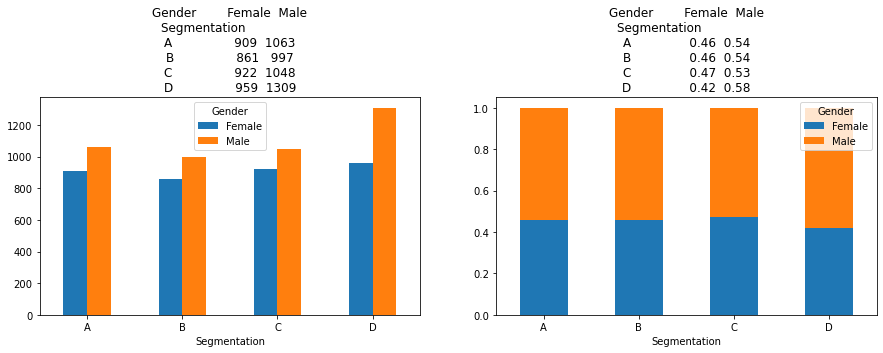

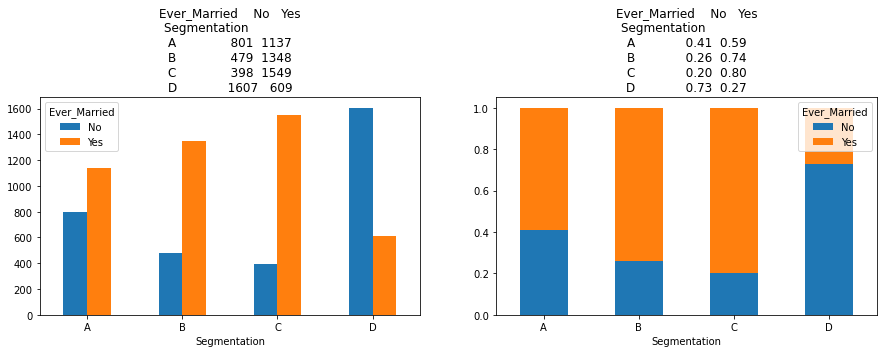

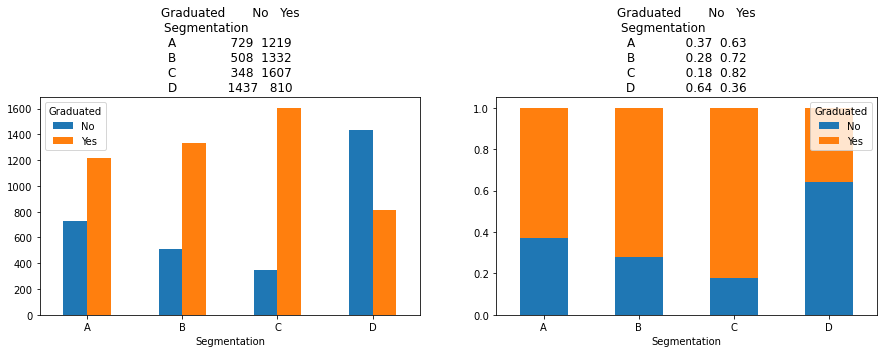

In [5]:
# Segmentation & Gender
ax1 = df.groupby(["Segmentation"])["Gender"].value_counts().unstack().round(3)

ax2 = df.pivot_table(columns='Gender',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))

# Segmentation & Ever_Married
ax1 = df.groupby(["Segmentation"])["Ever_Married"].value_counts().unstack().round(3)

ax2 = df.pivot_table(columns='Ever_Married',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))


# Segmentation & Graduated
ax1 = df.groupby(["Segmentation"])["Graduated"].value_counts().unstack().round(3)

ax2 = df.pivot_table(columns='Graduated',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))


plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder

df = df.dropna()
df_new = df.copy()

cat = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

le = LabelEncoder()
df_new
for c in cat:
    df_new[c] = le.fit_transform(df[c])

In [7]:
df_new['Segmentation'] = df_new['Segmentation'].replace(['A', 'B', 'C', 'D'], [1, 2, 3, 4])
df_new

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,4
2,466315,0,1,67,1,2,1.0,2,1.0,5,2
3,461735,1,1,67,1,7,0.0,1,2.0,5,2
5,461319,1,1,56,0,0,0.0,0,2.0,5,3
6,460156,1,0,32,1,5,1.0,2,3.0,5,3
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,1,1,41,1,0,0.0,1,5.0,5,2
8064,464685,1,0,35,0,4,3.0,2,4.0,3,4
8065,465406,0,0,33,1,5,1.0,2,1.0,5,4
8066,467299,0,0,27,1,5,1.0,2,4.0,5,2


In [8]:
df_f = df_new.iloc[:, 1:-1]
df_t = df_new.iloc[:,-1]

In [9]:
df_f.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
count,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000
mean,0.551688,0.591748,43.536084,0.637509,2.700975,2.629107,1.350638,2.841110,4.178395
std,0.497358,0.491547,16.524054,0.480755,2.519285,3.405365,0.852364,1.524743,1.409265
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000
50%,1.000000,1.000000,41.000000,1.000000,2.000000,1.000000,2.000000,2.000000,5.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,2.000000,4.000000,5.000000
max,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,6.000000


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_f = scaler.fit_transform(df_f)

In [11]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

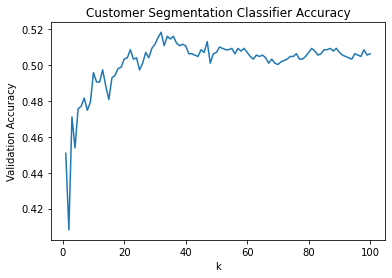

31


In [12]:
train_X, test_X, train_Y, test_Y = np.array(train_test_split(df_f, df_t, test_size = 0.2, random_state = 100))

k_list = range(1,101)
accuracies = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_X, train_Y.ravel())
    accuracies.append(knn.score(test_X, test_Y))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Customer Segmentation Classifier Accuracy")
plt.show()
max_index_col = np.argmax(accuracies, axis=0)
print(max_index_col) # finding the best k value

In [13]:
knn = KNeighborsClassifier(n_neighbors = 31)
knn.fit(train_X, train_Y)

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = knn, X = train_X, y = train_Y, cv = 10)
print("KNN Accuracy(cross validation):", accuracies.mean())
print("KNN Accuracy Score:", knn.score(test_X, test_Y))

KNN Accuracy(cross validation): 0.5063733653758319
KNN Accuracy Score: 0.5153788447111778


In [14]:
# Gaussian NB
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_X, train_Y)
ynew = gnb.predict(test_X)

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = gnb, X = train_X, y = train_Y, cv = 10)
print("Gaussian NB Accuracy(cross validation):",accuracies.mean())
print("Gaussian NB Accuracy Score:", gnb.score(test_X,test_Y))

Gaussian NB Accuracy(cross validation): 0.4844358482478516
Gaussian NB Accuracy Score: 0.5026256564141035


In [15]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(train_X, train_Y)
ynew = lda.predict(test_X)

accuracies = cross_val_score(estimator = lda, X = train_X, y = train_Y, cv = 10)
print("LDA Accuracy(cross validation):",accuracies.mean())
print("LDA Accuracy Score:", lda.score(test_X,test_Y))

LDA Accuracy(cross validation): 0.4902523346754643
LDA Accuracy Score: 0.5138784696174044


In [16]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_X, train_Y)
ynew = lr.predict(test_X)

accuracies = cross_val_score(estimator = lr, X = train_X, y = train_Y, cv = 10)
print("Logistic Regression Accuracy(cross validation):",accuracies.mean())
print("Logistic Regression Accuracy Score:", lr.score(test_X,test_Y))

Logistic Regression Accuracy(cross validation): 0.4941905404360871
Logistic Regression Accuracy Score: 0.5221305326331583


In [17]:
test = pd.read_csv('./Test.csv')
test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [18]:
test = test.iloc[:, 1:]

cat = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

le_test = LabelEncoder()

for c in cat:
    test[c] = le.fit_transform(test[c])
    
test = test.dropna()

In [19]:
scaler = MinMaxScaler()
test_set = test.copy()
test_set = scaler.fit_transform(test_set)
test

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1,36,1,2,0.0,2,1.0,5
1,1,1,37,1,5,8.0,0,4.0,5
2,0,1,69,0,9,0.0,2,1.0,5
3,1,1,59,0,4,11.0,1,2.0,5
5,1,1,47,1,1,0.0,1,5.0,3
...,...,...,...,...,...,...,...,...,...
2621,0,0,35,1,3,1.0,2,2.0,5
2622,1,0,29,0,5,9.0,2,4.0,5
2623,0,0,35,1,1,1.0,2,1.0,5
2625,1,1,47,1,4,1.0,1,5.0,3


In [20]:
pred = knn.predict(test_set)
test['Segmentation'] = pred

In [21]:
df_a = test[test['Segmentation'] == 1]
df_a.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.0
mean,0.474832,0.644295,45.659396,0.662752,2.543624,2.708054,1.615772,2.204698,4.065436,1.0
std,0.499786,0.559998,17.165133,0.490606,2.413500,3.465848,0.708901,1.302246,1.364895,0.0
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
25%,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.0
50%,0.000000,1.000000,41.000000,1.000000,2.000000,1.000000,2.000000,2.000000,5.000000,1.0
75%,1.000000,1.000000,52.000000,1.000000,3.000000,5.000000,2.000000,3.000000,5.000000,1.0
max,1.000000,2.000000,89.000000,2.000000,9.000000,14.000000,2.000000,8.000000,7.000000,1.0


In [22]:
df_b = test[test['Segmentation'] == 2]
df_b.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.0
mean,0.530067,0.848552,51.527840,0.719376,2.218263,2.427617,1.102450,2.496659,4.298441,2.0
std,0.499652,0.411068,14.298157,0.449805,2.558516,3.209187,0.844213,1.411247,1.351263,0.0
min,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.0
25%,0.000000,1.000000,40.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.0
50%,1.000000,1.000000,48.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,2.0
75%,1.000000,1.000000,61.000000,1.000000,4.000000,4.000000,2.000000,3.000000,5.000000,2.0
max,1.000000,2.000000,88.000000,1.000000,9.000000,14.000000,2.000000,9.000000,7.000000,2.0


In [23]:
df_c = test[test['Segmentation'] == 3]
df_c.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.0
mean,0.561702,0.991489,51.153191,0.976596,0.995745,2.008511,0.368085,2.904255,4.536170,3.0
std,0.496707,0.195722,11.947912,0.256026,1.800256,2.629165,0.614885,1.155954,1.263634,0.0
min,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.0
25%,0.000000,1.000000,42.250000,1.000000,0.000000,0.000000,0.000000,2.000000,5.000000,3.0
50%,1.000000,1.000000,50.000000,1.000000,0.000000,1.000000,0.000000,3.000000,5.000000,3.0
75%,1.000000,1.000000,60.000000,1.000000,1.000000,3.000000,1.000000,4.000000,5.000000,3.0
max,1.000000,2.000000,88.000000,2.000000,7.000000,11.000000,2.000000,9.000000,7.000000,3.0


In [24]:
df_d = test[test['Segmentation'] == 4]
df_d.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.0
mean,0.605053,0.224734,32.099734,0.341755,4.585106,2.829787,1.961436,3.497340,3.952128,4.0
std,0.489165,0.420861,13.954154,0.485706,2.272558,3.633000,0.212404,1.779449,1.546560,0.0
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.0
25%,0.000000,0.000000,23.000000,0.000000,3.000000,0.000000,2.000000,2.000000,3.000000,4.0
50%,1.000000,0.000000,29.000000,0.000000,5.000000,1.000000,2.000000,4.000000,5.000000,4.0
75%,1.000000,0.000000,35.000000,1.000000,5.000000,5.000000,2.000000,4.000000,5.000000,4.0
max,1.000000,2.000000,89.000000,2.000000,9.000000,14.000000,2.000000,9.000000,7.000000,4.0


In [25]:
test.to_csv('prediction.csv', index=False)

### Correlation Matrix

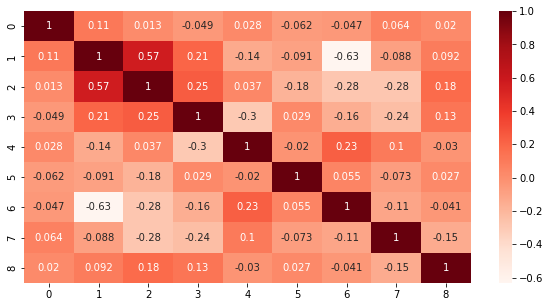

In [26]:
train_X = pd.DataFrame(train_X)
train_Y = pd.DataFrame(train_Y)

# plot a correlation matrix
plt.figure(figsize=(10,5))
cor = train_X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Feature Importance

0: 0.05378521569448664
1: 0.02127601379221241
2: 0.3731487576801963
3: 0.03345897679080655
4: 0.122148162378599
5: 0.14180290523665112
6: 0.059235906597668954
7: 0.10892499770354339
8: 0.08621906412583565


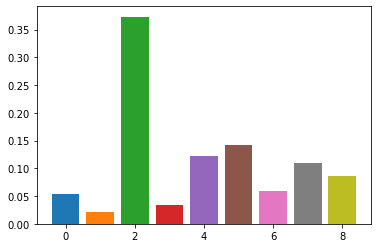

In [27]:
# Feature importance

classifier = DecisionTreeClassifier()
classifier.fit(train_X, train_Y)
for name, importance in zip(train_X.columns, classifier.feature_importances_):
    print(f'{name}: {importance}')
    # plot feature importance
    plt.bar(name, importance)
plt.show()

### K-Means

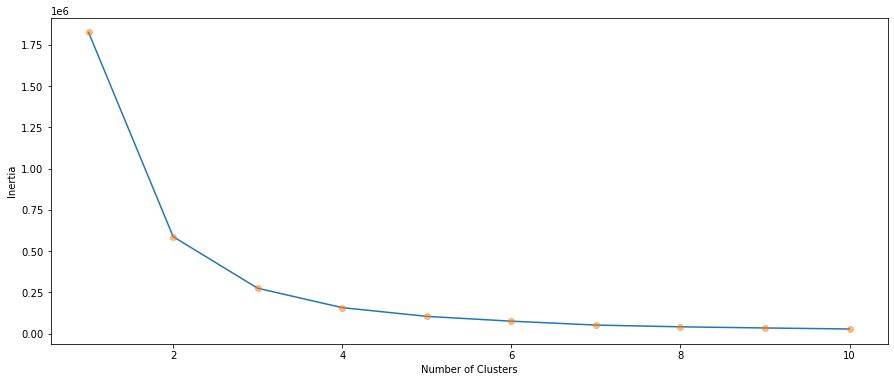

In [28]:
# Age & Spending Score
x_1 = df_new[['Age' , 'Spending_Score']].iloc[: , :].values
inertia = []
for i in range(1 , 11):
    algorithm = KMeans(n_clusters = i ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 105  , algorithm='elkan')
    algorithm.fit(x_1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , '-')
plt.plot(np.arange(1 , 11) , inertia , 'o' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

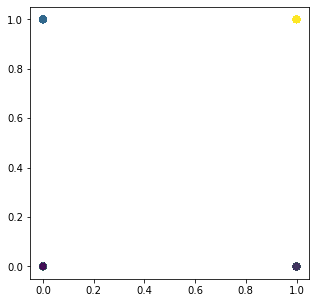

In [29]:
# K-means model
f, ax = plt.subplots(figsize = (5,5))

kmeans_model = KMeans(n_clusters= 4, init='k-means++',random_state=103)
y_kmeans_train = kmeans_model.fit_predict(train_X)

plt.scatter(train_X.iloc[:,0], train_X.iloc[:,1], c=y_kmeans_train, alpha=0.7, s=40)

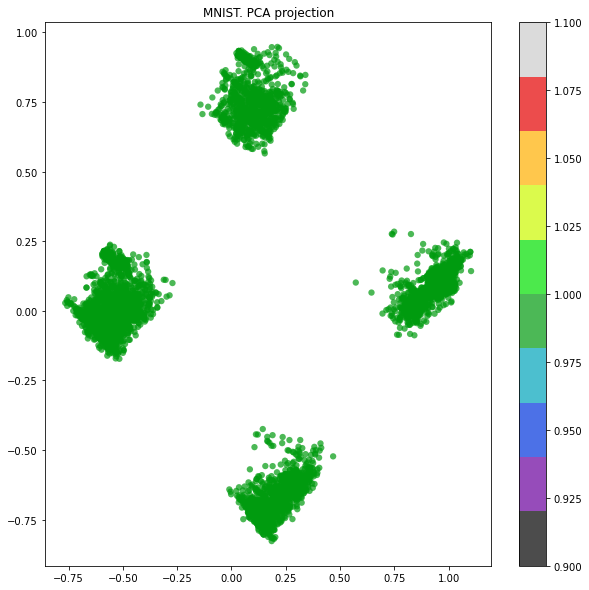

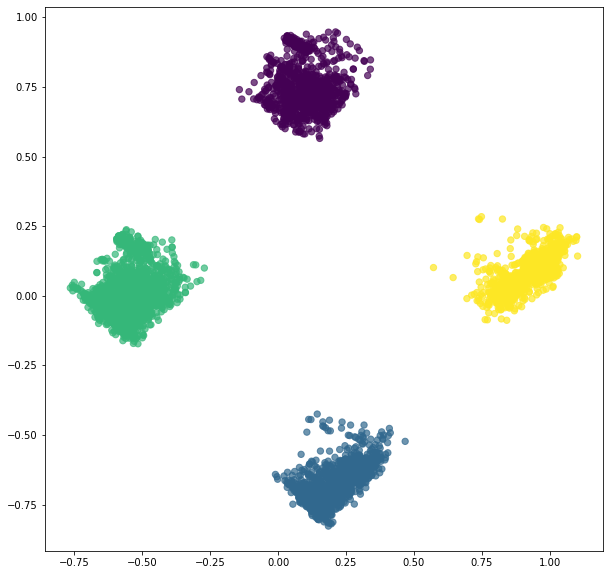

In [30]:
from sklearn.decomposition import PCA
from sklearn import preprocessing, decomposition
# Gender & Spending Score
pca = decomposition.PCA(n_components=2)
reduced_train_X = pca.fit_transform(train_X.drop(columns=[0,6]))

plt.figure(figsize=(10,10))
plt.scatter(reduced_train_X[:, 0], reduced_train_X[:, 1], c=[1]*train_X.shape[0], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

f, ax  = plt.subplots(figsize = (10,10))

kmeansmodel = KMeans(n_clusters= 4, init='k-means++',random_state=102)
y_kmeans_train = kmeansmodel.fit_predict(reduced_train_X)

plt.scatter(reduced_train_X[:,0], reduced_train_X[:,1], c=y_kmeans_train, alpha=0.7, s=40)